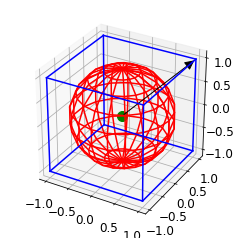

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

#plt.rcParams['axes.labelsize'] = 14
#plt.rcParams['xtick.labelsize'] = 12
#plt.rcParams['ytick.labelsize'] = 12

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# draw cube
r = [-1, 1]
# start, end of each cube point
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:   # edge line, length == 1 
        ax.plot3D(*zip(s, e), color="b")

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]  # 20j means 20 numbers
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r")    # show frame, not all or scatter3D

# draw a point
ax.scatter([0], [0], [0], color="g", s=100)

# draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

a = Arrow3D([0, 1], [0, 1], [0, 1], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)
plt.show()

In [37]:
ax.plot_wireframe?

In [25]:
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]  # 20j means 20 numbers

In [28]:
np.mgrid[0:2*np.pi:20j, 0:np.pi:10j].shape

(2, 20, 10)

In [46]:
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    print s,e

[-1 -1 -1] [-1 -1  1]
[-1 -1 -1] [-1  1 -1]
[-1 -1 -1] [-1  1  1]
[-1 -1 -1] [ 1 -1 -1]
[-1 -1 -1] [ 1 -1  1]
[-1 -1 -1] [ 1  1 -1]
[-1 -1 -1] [1 1 1]
[-1 -1  1] [-1  1 -1]
[-1 -1  1] [-1  1  1]
[-1 -1  1] [ 1 -1 -1]
[-1 -1  1] [ 1 -1  1]
[-1 -1  1] [ 1  1 -1]
[-1 -1  1] [1 1 1]
[-1  1 -1] [-1  1  1]
[-1  1 -1] [ 1 -1 -1]
[-1  1 -1] [ 1 -1  1]
[-1  1 -1] [ 1  1 -1]
[-1  1 -1] [1 1 1]
[-1  1  1] [ 1 -1 -1]
[-1  1  1] [ 1 -1  1]
[-1  1  1] [ 1  1 -1]
[-1  1  1] [1 1 1]
[ 1 -1 -1] [ 1 -1  1]
[ 1 -1 -1] [ 1  1 -1]
[ 1 -1 -1] [1 1 1]
[ 1 -1  1] [ 1  1 -1]
[ 1 -1  1] [1 1 1]
[ 1  1 -1] [1 1 1]


In [53]:
r

[-1, 1]

In [48]:
np.sum(np.abs(s-e)) == r[1]-r[0]

True